In [158]:
from astropy import units as u
from astropy import time
import numpy as np
from poliastro.bodies import Earth, Mars, Sun
from poliastro.twobody import Orbit
from poliastro.util import time_range
from poliastro.plotting import OrbitPlotter3D
from poliastro.plotting import OrbitPlotter2D
import matplotlib.pyplot as plt
%matplotlib notebook

In [159]:
# https://docs.poliastro.space/en/latest/autoapi/poliastro/twobody/orbit/index.html
circularorbit = Orbit.circular(Earth, 6793137 * u.meter, 0*u.deg, 0*u.deg, 0*u.deg)#, time.Time("2006-01-19", scale='utc'))

In [194]:
coord = circularorbit.sample(1000)
# .sample from poliastro documentation, divides a "single loop" around the orbit into specified numbers.

# print(coord[0].x + 1*u.km)


In [161]:

plotter = OrbitPlotter3D()
plotter.set_attractor(Earth)
plotter.plot(circularorbit)
plotter.set_view(30 * u.deg, 260 * u.deg, distance=3 * u.km)

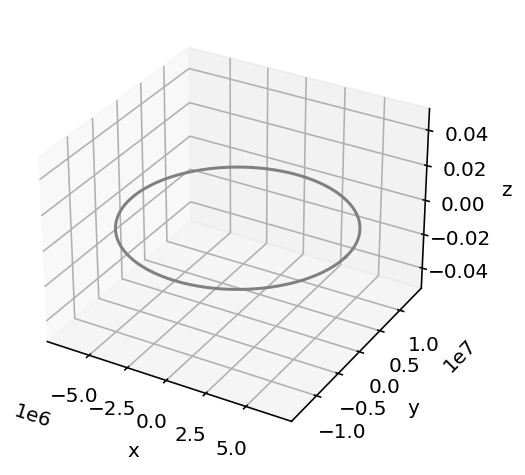

In [163]:
# This makes the plots appear inside the notebook
get_ipython().run_line_magic('matplotlib', 'inline')

from scipy.integrate import odeint

miu = 3.986*10**14
a = 6793137
n = np.sqrt(miu/(a**3))

# Define a function which calculates the derivative
def dU_dx(U, x):
    return [U[1],   3*(n**2)*U[0]+2*n*U[3],   U[3],   -2*n*U[1],     U[5],      -(n**2)*U[4]]

U0 = [a,0,0,-2*n*a,0,0]

xs = np.linspace(0,5580,1000)
# given assumption of one orbital period of 93 min = 5580 seconds

Us = odeint(dU_dx, U0, xs)
xval = Us[:,0] #first column x-coordinates
yval = Us[:,2]
zval = Us[:,4]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')  
ax.set_aspect('auto')
ax.plot3D(xval,yval,zval, 'grey')


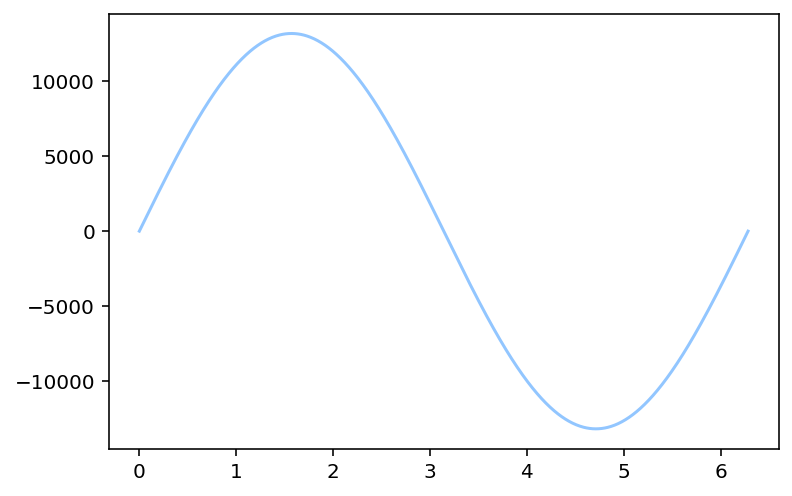

In [164]:
anglestep = np.linspace(0, 2*np.pi, 1000)

# def rot(x,y,theta):
#     rotationmat = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
#     return np.matmul(rotationmat, np.array([[x],[y]]))
#return np.matmul(rotationmat, np.array([[x.value],[y.value]]))

newz = np.copy(zval) + np.copy(coord.z.value)
newx = np.copy(xval) + np.copy(coord.x.value)
newy = np.copy(yval) + np.copy(coord.y.value)

# for i in range(1000):
#     rotated = rot(np.copy(coord.x.value)[i],np.copy(coord.y.value)[i],anglestep[i])
#     newx[i] = newx[i] + rotated[0]
#     newy[i] = newy[i] + rotated[1]
plt.plot(anglestep, newy-yval)
plt.show  
newx = newx*u.km    
newy = newy*u.km 
newz = newz*u.km


In [195]:

%matplotlib notebook

<IPython.core.display.Javascript object>


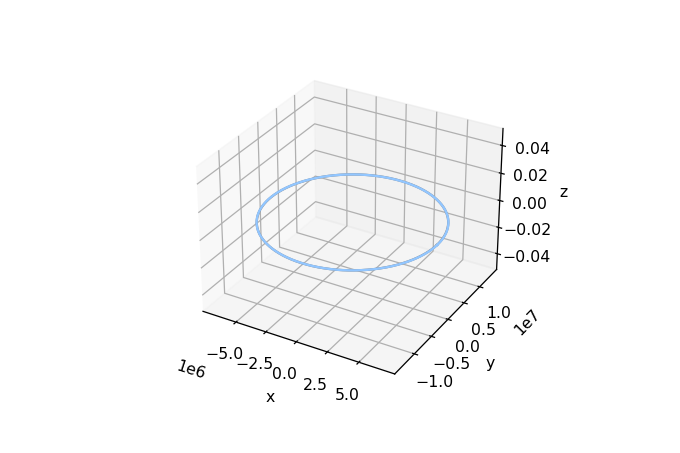

In [196]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')  
ax.set_aspect('auto')
ax.plot3D(xval,yval,zval, 'grey')
ax.plot3D(newx,newy,newz)


In [168]:
#Create orbit class from coordinates
#https://docs.poliastro.space/en/stable/autoapi/poliastro/twobody/orbit/index.html

In [200]:
from astropy.coordinates import CartesianRepresentation
rep = CartesianRepresentation(newx/1000,
                              newy/1000,
                              newz/1000 )

#https://docs.poliastro.space/en/stable/autoapi/poliastro/plotting/_base/index.html?highlight=trajectory#poliastro.plotting._base.Trajectory
#plot_trajectory(self, coordinates, label=None, color=None, trail=False)

plotter = OrbitPlotter3D()
plotter.set_attractor(Earth)
plotter.plot(circularorbit)
plotter.plot_trajectory(rep, label="Chaser")

<IPython.core.display.Javascript object>


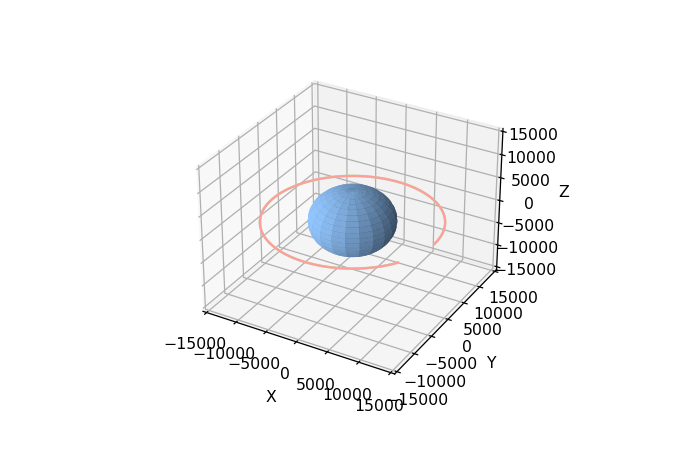

In [198]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib inline
%matplotlib notebook

#Create Earth on Figure ###############################

u = np.linspace(0,2*np.pi,100)
v = np.linspace(0,  np.pi,100)
r = 6378.1 #km
xe = r * np.outer(np.cos(u), np.sin(v))
ye = r * np.outer(np.sin(u), np.sin(v))
ze = r * np.outer(np.ones(np.size(u)), np.cos(v))

#PRESET POINTS for target ##############################
x = coord.x.value
y = coord.y.value
z = coord.z.value

#Put into array of shape(number of values, 3)
coordinate = x.reshape(x.shape[0],1)
y = y.reshape(x.shape[0],1)
z = z.reshape(x.shape[0],1)
coordinate= np.append(coordinate, y, axis = 1)
coordinate= np.append(coordinate, z, axis = 1)

#PRESET POINTS for chaser ##############################
xc = newx.value
yc = newy.value
zc = newz.value

#Put into array of shape(number of values, 3)
coordinatec = xc.reshape(xc.shape[0],1)
yc = yc.reshape(xc.shape[0],1)
zc = zc.reshape(xc.shape[0],1)
coordinatec= np.append(coordinate, yc, axis = 1)
coordinatec= np.append(coordinate, zc, axis = 1)

# Animation ############################################

def update_lines(num, walks, lines):
    for line, walk in zip(lines, walks):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(walk[:num, :2].T)
        line.set_3d_properties(walk[:num, 2])
    return lines

num_steps = x.shape[0]
walks = [coordinate]
walksc = [coordinatec]


# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(xe,ye,ze,rstride = 5, cstride = 5)

# Create lines initially without data
lines = [ax.plot([], [], [])[0]]
linesc = [ax.plot([], [], [])[0]]

# Setting the axes properties
ax.set(xlim3d=(-15000, 15000), xlabel='X')
ax.set(ylim3d=(-15000, 15000), ylabel='Y')
ax.set(zlim3d=(-15000, 15000), zlabel='Z')

# Creating the Animation object
ani = animation.FuncAnimation(
    fig, update_lines, num_steps, fargs=(walks, lines), interval=2)
anic = animation.FuncAnimation(
    fig, update_lines, num_steps, fargs=(walksc, linesc), interval=2)

plt.show()